# News Headline EDA

In [1]:
# importing all my dependancies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import string
import re

In [3]:
corpus = pd.read_csv('../data/labeled_newscatcher_dataset.csv', sep=";")
corpus.shape

(108774, 6)

In [4]:
corpus.head()

,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en


In [5]:
# checking for nulls
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108774 entries, 0 to 108773
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   topic           108774 non-null  object
 1   link            108774 non-null  object
 2   domain          108774 non-null  object
 3   published_date  108774 non-null  object
 4   title           108774 non-null  object
 5   lang            108774 non-null  object
dtypes: object(6)
memory usage: 5.0+ MB


In [7]:
corpus['domain'].value_counts()

dailymail.co.uk                1855
theguardian.com                1439
express.co.uk                  1403
timesofindia.indiatimes.com    1313
globenewswire.com              1187
                               ... 
tv24.tv                           1
nintendo.com                      1
indiaspend.com                    1
wlky.com                          1
awn.com                           1
Name: domain, Length: 5164, dtype: int64

In [6]:
# As we can see here, the Science topic has only a third of the news stories compared to the other topics
# The class imbalance could cause an issue later 
corpus['topic'].value_counts()

WORLD            15000
SPORTS           15000
BUSINESS         15000
HEALTH           15000
TECHNOLOGY       15000
ENTERTAINMENT    15000
NATION           15000
SCIENCE           3774
Name: topic, dtype: int64

C:\Users\deaud\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


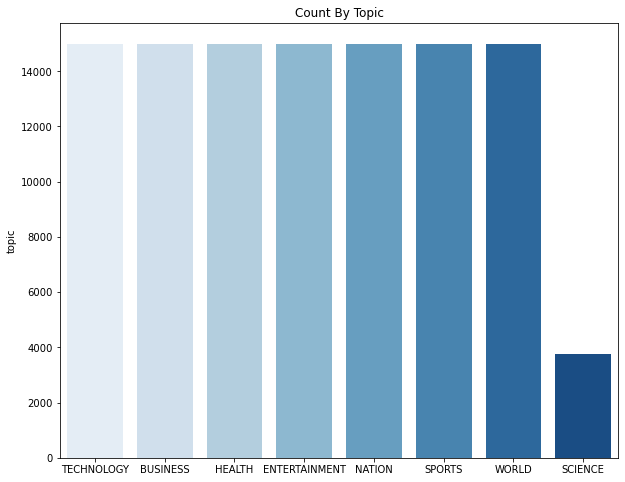

In [10]:
x = corpus["topic"].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x.index, x, palette='Blues')
plt.title("Count By Topic");

In [8]:
# checking the language of all the data (although not always accurate)
corpus['lang'].value_counts()

en    108774
Name: lang, dtype: int64

In [9]:
# checking out the titles
corpus.loc[100].title

'Insect can escape after being eaten by frog, scientists find'

## Data Cleaning and EDA 

In [10]:
# cleaning my test data
sw = stopwords.words('english') + list(string.punctuation)

corpus.title = [word.lower() for word in corpus.title]
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
corpus.title = [nltk.regexp_tokenize(line, pattern) for line in corpus.title]
lemma = WordNetLemmatizer()
corpus.title= [[lemma.lemmatize(word) for word in line] for line in corpus.title]
corpus.title = [[word for word in line if word not in sw] for line in corpus.title]

In [11]:
corpus.title

0         [closer, look, water, splitting's, solar, fuel...
1         [irresistible, scent, make, locust, swarm, stu...
2         [artificial, intelligence, warning, ai, know, ...
3            [glacier, could, sculpted, mar, valley, study]
4         [perseid, meteor, shower, time, see, huge, bri...
                                ...                        
108769    [pdp, governor, forum, urge, security, agency,...
108770    [q, apple, dominated, premium, smartphone, seg...
108771    [coronavirus, northern, ireland, full, breakdo...
108772    [paul, mccartney, detail, post, beatles, distr...
108773    [report, talk, underway, keep, shane, duffy, p...
Name: title, Length: 108774, dtype: object

In [12]:
from textblob import TextBlob, Word
from wordcloud import WordCloud

In [13]:
dict_of_topics = {}

for topic in corpus.topic.unique():
    current_corpus = corpus.loc[corpus['topic'] == topic]
    dict_of_topics[topic] = list(current_corpus.title)

In [16]:
dict_of_topics

{'SCIENCE': [['closer',
   'look',
   'water',
   "splitting's",
   'solar',
   'fuel',
   'potential'],
  ['irresistible', 'scent', 'make', 'locust', 'swarm', 'study', 'find'],
  ['artificial',
   'intelligence',
   'warning',
   'ai',
   'know',
   'u',
   'better',
   'know'],
  ['glacier', 'could', 'sculpted', 'mar', 'valley', 'study'],
  ['perseid',
   'meteor',
   'shower',
   'time',
   'see',
   'huge',
   'bright',
   'fireball',
   'uk',
   'tonight'],
  ['nasa', 'release', 'depth', 'map', 'beirut', 'explosion', 'damage'],
  ['spacex', 'nasa', 'demo', 'rocket', 'launch', 'set', 'saturday', 'watch'],
  ['orbital', 'space', 'tourism', 'set', 'rebirth'],
  ["greenland's",
   'melting',
   'ice',
   'sheet',
   'ha',
   'passed',
   'point',
   'return'],
  ['nasa',
   'invite',
   'engineering',
   'student',
   'help',
   'harvest',
   'water',
   'mar',
   'moon'],
  ['astronomer',
   'detect',
   'electromagnetic',
   'signal',
   'caused',
   'unequal',
   'neutron',
   'sta

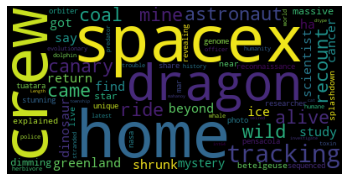

<Figure size 1440x720 with 0 Axes>

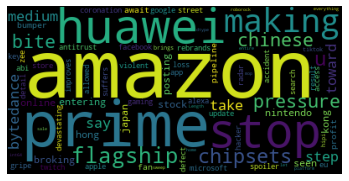

<Figure size 1440x720 with 0 Axes>

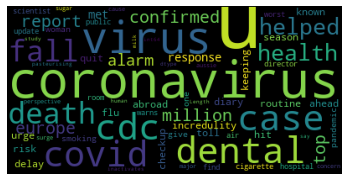

<Figure size 1440x720 with 0 Axes>

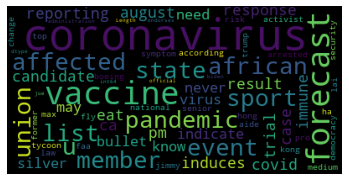

<Figure size 1440x720 with 0 Axes>

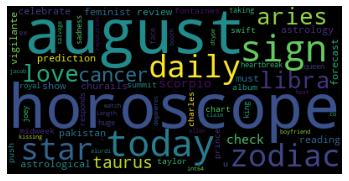

<Figure size 1440x720 with 0 Axes>

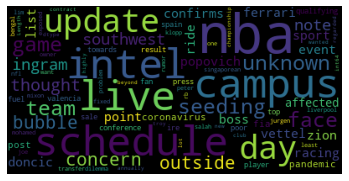

<Figure size 1440x720 with 0 Axes>

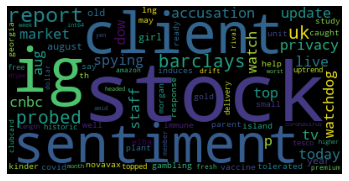

<Figure size 1440x720 with 0 Axes>

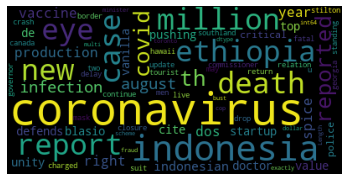

<Figure size 1440x720 with 0 Axes>

In [15]:
for name, values in dict_of_topics.items():
    counts = pd.Series(dict_of_topics[name]).value_counts()
    wordcloud= WordCloud(max_words=100, width=400, height=200).generate(str(counts))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.figure(figsize=(20,10))
    #plt.title(name)
    plt.show()

array([<AxesSubplot:title={'center':'word'}>], dtype=object)

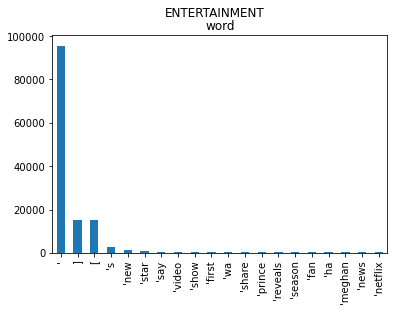

In [36]:
blob = TextBlob(str(dict_of_topics['ENTERTAINMENT']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
word_df = pos_df.word.value_counts()[:20]
word_df.plot(kind='bar', title='ENTERTAINMENT', subplots=True)

array([<AxesSubplot:title={'center':'word'}>], dtype=object)

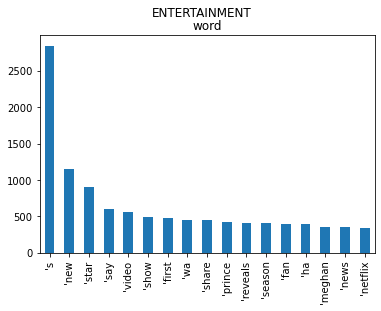

In [35]:
blob = TextBlob(str(dict_of_topics['ENTERTAINMENT']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
word_df = pos_df.word.value_counts()[3:20]
word_df.plot(kind='bar', title='ENTERTAINMENT', subplots=True)

array([<AxesSubplot:title={'center':'word'}>], dtype=object)

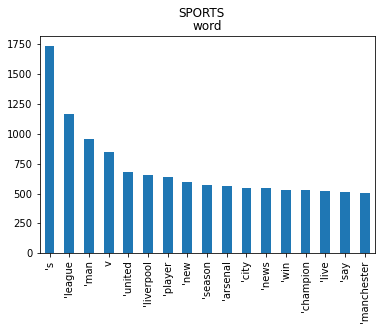

In [34]:
blob = TextBlob(str(dict_of_topics['SPORTS']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
word_df = pos_df.word.value_counts()[3:20]
word_df.plot(kind='bar', title='SPORTS', subplots=True)

array([<AxesSubplot:title={'center':'word'}>], dtype=object)

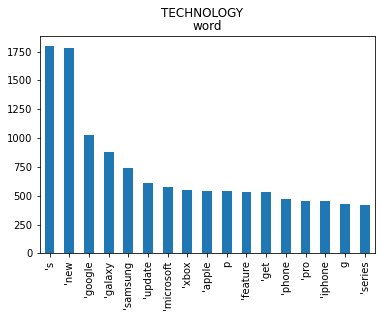

In [33]:
blob = TextBlob(str(dict_of_topics['TECHNOLOGY']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
word_df = pos_df.word.value_counts()[3:20]
word_df.plot(kind='bar', title='TECHNOLOGY', subplots=True)

array([<AxesSubplot:title={'center':'word'}>], dtype=object)

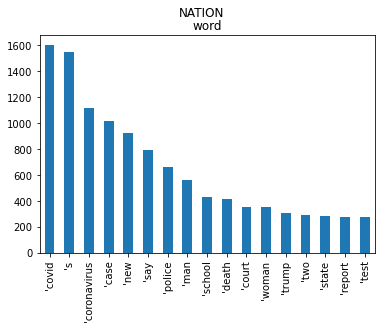

In [32]:
blob = TextBlob(str(dict_of_topics['NATION']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
word_df = pos_df.word.value_counts()[3:20]
word_df.plot(kind='bar', title='NATION', subplots=True)

array([<AxesSubplot:title={'center':'word'}>], dtype=object)

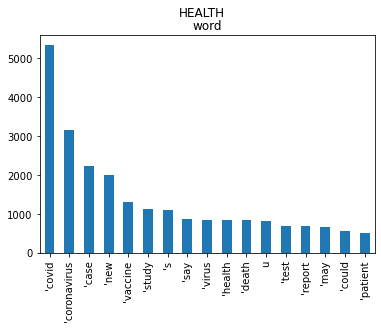

In [31]:
blob = TextBlob(str(dict_of_topics['HEALTH']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
word_df = pos_df.word.value_counts()[3:20]
word_df.plot(kind='bar', title='HEALTH', subplots=True)

array([<AxesSubplot:title={'center':'word'}>], dtype=object)

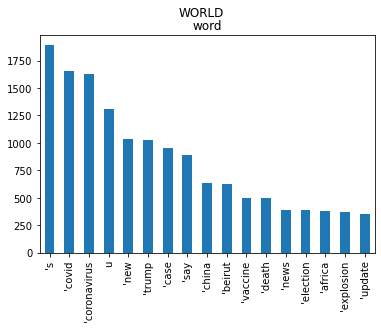

In [30]:
blob = TextBlob(str(dict_of_topics['WORLD']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
word_df = pos_df.word.value_counts()[3:20]
word_df.plot(kind='bar', title='WORLD', subplots=True)

array([<AxesSubplot:title={'center':'word'}>], dtype=object)

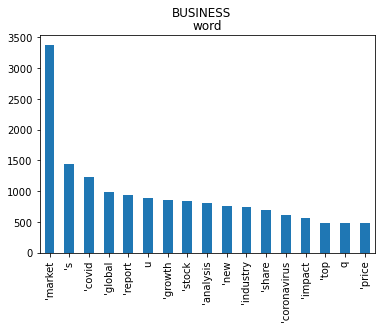

In [29]:
blob = TextBlob(str(dict_of_topics['BUSINESS']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
word_df = pos_df.word.value_counts()[3:20]
word_df.plot(kind='bar', title='BUSINESS', subplots=True)

array([<AxesSubplot:title={'center':'word'}>], dtype=object)

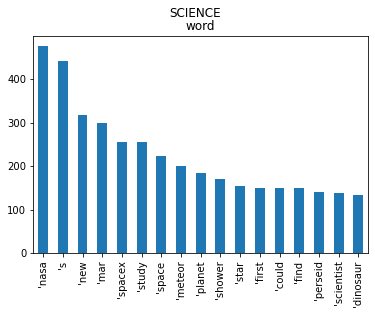

In [28]:
blob = TextBlob(str(dict_of_topics['SCIENCE']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
word_df = pos_df.word.value_counts()[3:20]
word_df.plot(kind='bar', title='SCIENCE', subplots=True)